# Load a JSON file with D3.json()

To download the zip file containing the data file, use the following link.

Download the data (Links to an external site.)

Recall the previous syntax used to place an API call:

In [ ]:
const url = "https://api.spacexdata.com/v2/launchpads";
d3.json(url).then();

Here, the URL string is received by d3.json() as an argument. The d3.json() method then retrieves the data from the address specified by the URL. After the data is fully retrieved, the function inside the then()method is executed.

The syntax used to retrieve data from an external data file, instead of a web API, is the same:

In [ ]:
d3.json("samples.json").then(function(data){
    console.log("hello");
});

When we open the browser, however, nothing is printed to the console. We get this error message:

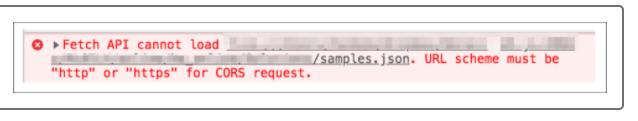

What gives? What is a CORS request?

The short explanation is that, for security reasons, a local server must be run when loading an external file into a JavaScript script file. If you don't understand these security issues right now, don't worry. We will come back to it later.

To load the page, navigate to the directory where samples.json and index.html, as well as the script file, plots.js, are located. Open the command line (Terminal or Git Bash) and type the following:

In [ ]:
python -m http.server

You should see the following message in the command line:

In [ ]:
Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...
127.0.0.1 - - [30/Oct/2019 13:23:53] "GET / HTTP/1.1" 304 -

Navigate to the given port number in your browser: localhost:8000. When you do this, you'll see the following screen:

## IMPORTANT
When reading an external data file such as a CSV or JSON file into a script, you must run a server. You cannot directly open index.htmlwith your browser.

You're now prepared to help Roza read and parse the actual data. Modify the code to change the printed console message from a simple "hello" to the entire dataset:

## Parse the Data

In [ ]:
d3.json("samples.json").then(function(data){
    console.log(data);
});

Then examine the results in the browser console:

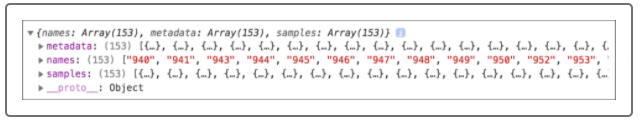

The data is structured as an object that contains three keys at the top level: metadata, names, and samples. Each of these keys is associated with an array that contains 153 elements.

Let's look at each array in more detail. Click on the arrows successively to list the details of the first person:

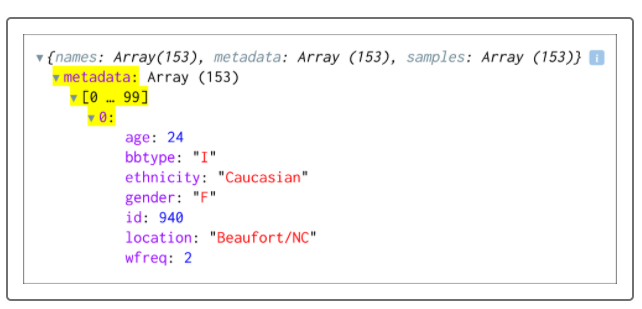

The metadata array contains objects, each of which contains details of a volunteer, such as age, location, ethnicity, ID number, and weekly washing frequency of the belly button.

Extact only the wfreq of each person

In [ ]:
d3.json("samples.json").then(function(data){
    wfreq = data.metadata.map(person => person.wfreq);
    console.log(wfreq);
});

The map() method is used to extract the wfreq property from each “person” in the data.metadata array.

sort the wfreq array in descending order. 

In [ ]:
d3.json("samples.json").then(function(data){
    wfreq = data.metadata.map(person =>
person.wfreq).sort((a,b) => b - a);
    console.log(wfreq);
});

the sort() method returns b - a to return the results in descending order. It would return a - b to return the results in ascending order.

delete null values from the sorted wfreq array. 

In [ ]:
d3.json("samples.json").then(function(data){
    wfreq = data.metadata.map(person =>
person.wfreq).sort((a,b) => b - a);
    filteredWfreq = wfreq.filter(element => element !=
null);
    console.log(filteredWfreq);
});

Now let's examine the rest of the dataset. Looking at the image below, we can see that names is simply an array of the ID numbers of the volunteers. Even though this information is included in the metadata array, the names array may be useful in rapidly retrieving an ID number when creating a plot.



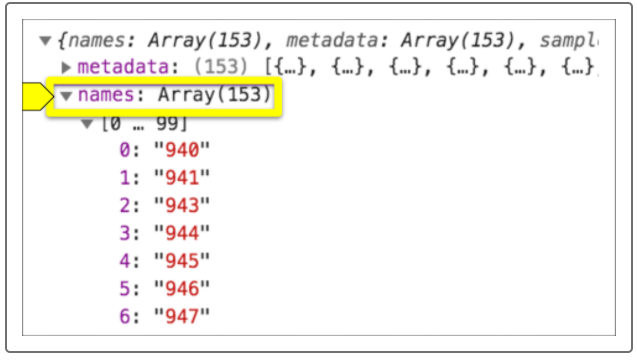

Next, check out the samples array and inspect the first element.

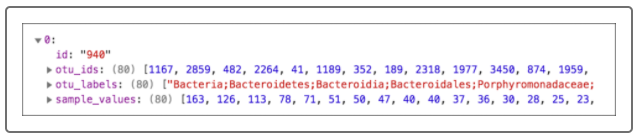

The array's first element is an object, with four key-value pairs. Note the following:

The id key identifies the ID number.

The otu_ids property is an array of the ID numbers of all the bacteria found in this person's navel. OTU stands for Operational Taxonomic Unit, and here it means species or bacterial type. In this instance, there were 80 bacterial types with distinct ID numbers.

The sample_values array contains the corresponding species name for each bacterial ID number. Some bacterial species have different ID numbers, but are clumped together under the same otu_label.

In her final visualization of the belly button data, Roza would like to be able to select an individual from a dropdown menu. Once a person's ID number is selected, she would like to display the demographic information of that individual. Since each individual is represented by an object, she'll need to access both keys and values inside an object in order to do this.

## REWIND
The Object.entries() method allows access to both an object's keys and values. It returns each key-value pair as an array.

Use Object.entries() to print each key-value pair inside an array.

In [ ]:
researcher1 = {
    name: 'Roza',
    age: 34,
    hobby: 'Hiking'
};

In [ ]:
console.log(Object.entries(researcher1));

## REWIND
The forEach()method allows access to each element of an array.

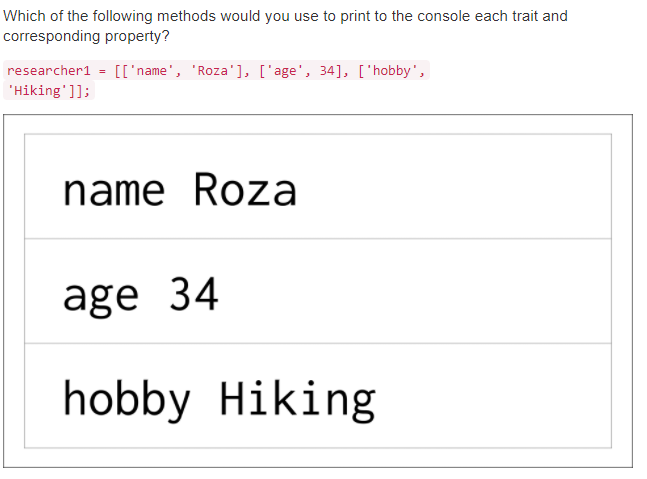

This method iterates through each element in an array. In this case, there are smaller arrays, each including two elements, inside an outer array. To access these elements, the argument ([first, second]) is used, where first and second are arbitrarily chosen for convenience. They could have been named ([x, y]) or ([key, value]).


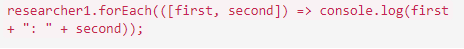

Roza has made a definite step forward. With the following code, we can display the metadata of any individual from the dataset:

In [ ]:
d3.json("samples.json").then(function(data){
    firstPerson = data.metadata[0];
    Object.entries(firstPerson).forEach(([key, value]) =>
      {console.log(key + ': ' + value);});
});

In this case, we are extracting the metadata of the first person in the dataset, as indicated by the zero index position in metadata[0]. We then use the Object.entries() method to return each key-value pair in an array, and the forEach()method to access each element of these pairs.

Open the browser console to see the results:

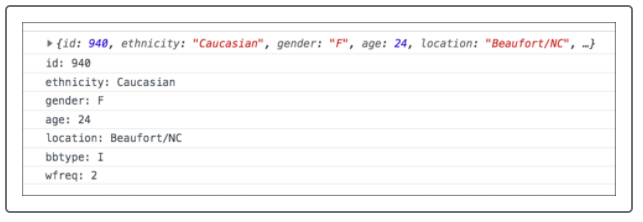

Here, we manually specify the individual by the index position. Ultimately, we need to be able to choose an ID number from a dropdown menu and then display the metadata associated with that ID.

## Handle CORS Errors
When Roza first began to learn to use Plotly, the data used to create charts were contained in the JavaScript file. She was able to open index.html directly in her browser and see the graphs. Likewise, when she made a call to the SpaceX API, she was able to open index.html directly in her browser.

However, when she attempted to read data from an external JSON file, she encountered an error:

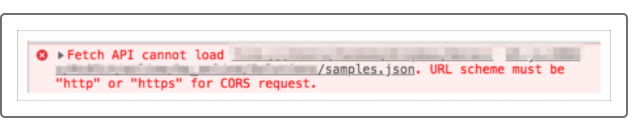

To bypass this CORS error message, we navigated to the directory where index.html is located and ran python -m http.server in the CLI.

CORS stands for Cross-Origin Resource Sharing. In short, browsers by default do not permit reading of resources from multiple sources. This restriction is in place because of security concerns.

To better understand the issue, we first need to define servers. A server is a program or device that performs actions such as processing and sharing data. Our discussion will be limited to servers in the sense of software programs.

A Flask app, for example, is a server program that processes and shares data. Likewise, when we place a call to the SpaceX API, there is a server behind the scenes that processes and shares the requested data. Another example is when a user logs in on a website, the server receives the user's information, compares it against information in its database, and approves or denies the login attempt.

This is called a request-response model. The user (also known as the client) sends a request to the webpage server. The server, in turn, sends the requested data in response.

Web browsers, for security reasons, heavily restrict reading from, and writing to, local files. If access to local files was allowed, remote sites would be allowed to read and manipulate your private data. Or simply opening a local file with the browser could trigger a malicious script that transmits your data across the internet. This is why we're unable to read a JSON file directly.

However, running a static server, or python -m http.server in our case, allows us to skirt this restriction. Python's HTTP server provides a web address for both the JSON and HTML files to avoid these security issues.

Now let's return to the browser error message: URL scheme must be 'http' or 'https' for CORS request. This means that the browser can request external data only through the HTTP/HTTPS protocols. In other words, the CORS policy, by default, does not allow data to come in through channels other than through HTTP or HTTPS. Furthermore, the origin of the data must be from a single source, unless specified by CORS.

Here is a concrete example of how CORS works. Suppose that you navigate to a news website, and you are served an ad from adspamnetwork.com. If you happen to be logged into PayPal, and if these browser restrictions weren't in place, the JavaScript code in the ad might make an API call to PayPal and make unauthorized transactions. For this reason, browsers restrict a server from one site (adspamnetwork.com in this case) from making a request to a server from a different site (paypal.com) unless it has been given explicit permission.

How, then, does a website such as ebay.com make API calls to PayPal? The browser generally makes a preflight request to the server, which verifies whether the browser's origin is allowed to make a request to it. The preflight request also includes other details, such as the types of requests permitted to be made, and the types of files permitted to be transferred. Then a request is made. The code on PayPal's server contains a CORS header that explicitly permits ebay.com to make API requests.